In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url="https://results.eci.gov.in/PcResultGenJune2024/index.htm"

page = requests.get(url)
soup = BeautifulSoup(page.text,"html.parser")

soup

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=7" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="300" http-equiv="refresh"/>
<!-- Bootstrap CSS -->
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<link href="css/custom.css" rel="stylesheet"/>
<link href="css/responsive.css" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet"/>
<link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<title>Election Commission of India</title>
<style type="text/css">
</style>
<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="True")a.BOOMR_config=a.BOOMR_con

In [3]:
table = soup.find('table', class_='table')

heads = table.find('thead')
headr = heads.find_all('th')
header = [th.text.strip() for th in headr]

foots = table.find('tfoot')
footr = foots.find_all('th')
footer = [th.text.strip() for th in footr]

In [4]:
table = soup.find("tbody")
rows = table.find_all("tr")

In [5]:
party_name = []
won_seats = []
leading_seats = []
total_seats = []

In [6]:
#Testing

row = rows[0]
tds = row.find_all("td")
print("-",tds[0].text.strip(),"-")
print("-",tds[1].text.strip(),"-")
print("-",tds[2].text.strip(),"-")
print("-",tds[3].text.strip(),"-")

- Bharatiya Janata Party - BJP -
- 240 -
- 0 -
- 240 -


In [7]:
for row in rows:
    cols = row.find_all('td')
    party_name.append(cols[0].text.strip())
    won_seats.append(cols[1].text.strip())
    leading_seats.append(cols[2].text.strip())
    total_seats.append(cols[3].text.strip())   

In [8]:
party_abb=[party.split()[-1] for party in party_name]

In [9]:
party_results = pd.DataFrame({
    'Party': party_name,
    'Party Abbreviation': party_abb,
    'Won': won_seats,
    'Leading': leading_seats,
    'Total': total_seats
})

In [10]:
party_results

,Party,Party Abbreviation,Won,Leading,Total
0,Bharatiya Janata Party - BJP,BJP,240,0,240
1,Indian National Congress - INC,INC,99,0,99
2,Samajwadi Party - SP,SP,37,0,37
3,All India Trinamool Congress - AITC,AITC,29,0,29
4,Dravida Munnetra Kazhagam - DMK,DMK,22,0,22
5,Telugu Desam - TDP,TDP,16,0,16
6,Janata Dal (United) - JD(U),JD(U),12,0,12
7,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,SHSUBT,9,0,9
8,Nationalist Congress Party – Sharadchandra Paw...,NCPSP,8,0,8
9,Shiv Sena - SHS,SHS,7,0,7


In [11]:
party_results["Total"] = party_results["Total"].astype('Int64')
party_results["Won"] = party_results["Won"].astype('Int64')
party_results["Leading"] = party_results["Leading"].astype('Int64')
party_results.dtypes


Party                 object
Party Abbreviation    object
Won                    Int64
Leading                Int64
Total                  Int64
dtype: object

In [32]:
import matplotlib.pyplot as plt


N = 8  # Number of top parties to show individually
top_parties = party_results.head(N)
others = pd.DataFrame({
    'Party': ['Others'],
    'Party Abbreviation': "Others",
    'Won': [party_results.iloc[N:]['Won'].sum()],
    'Leading': [party_results.iloc[N:]['Leading'].sum()],
    'Total': [party_results.iloc[N:]['Total'].sum()]
})
df_plot = pd.concat([top_parties, others])


In [33]:
others

,Party,Party Abbreviation,Won,Leading,Total
0,Others,Others,79,0,79


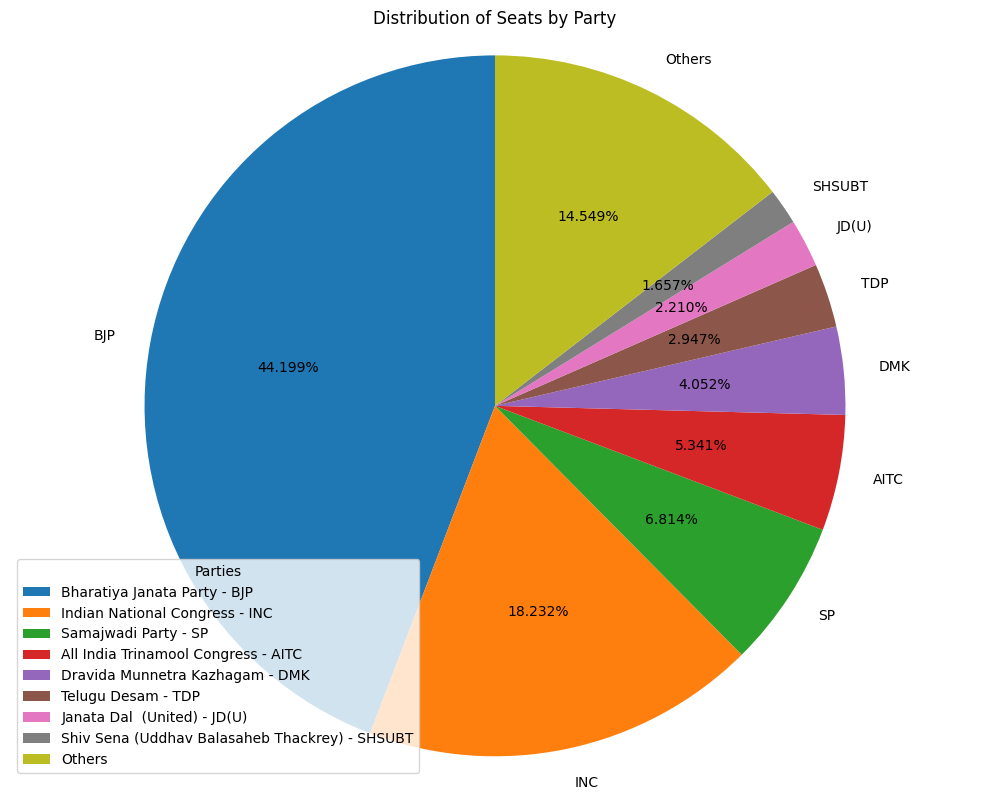

In [34]:
plt.figure(figsize=(10,8))
plt.pie(df_plot["Won"],labels=df_plot['Party Abbreviation'],autopct='%1.3f%%', startangle=90)
plt.title('Distribution of Seats by Party')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a legend
plt.legend(df_plot['Party'], title="Parties", loc="lower left")

plt.tight_layout()
plt.show()

In [35]:
df_plot.shape

(9, 5)

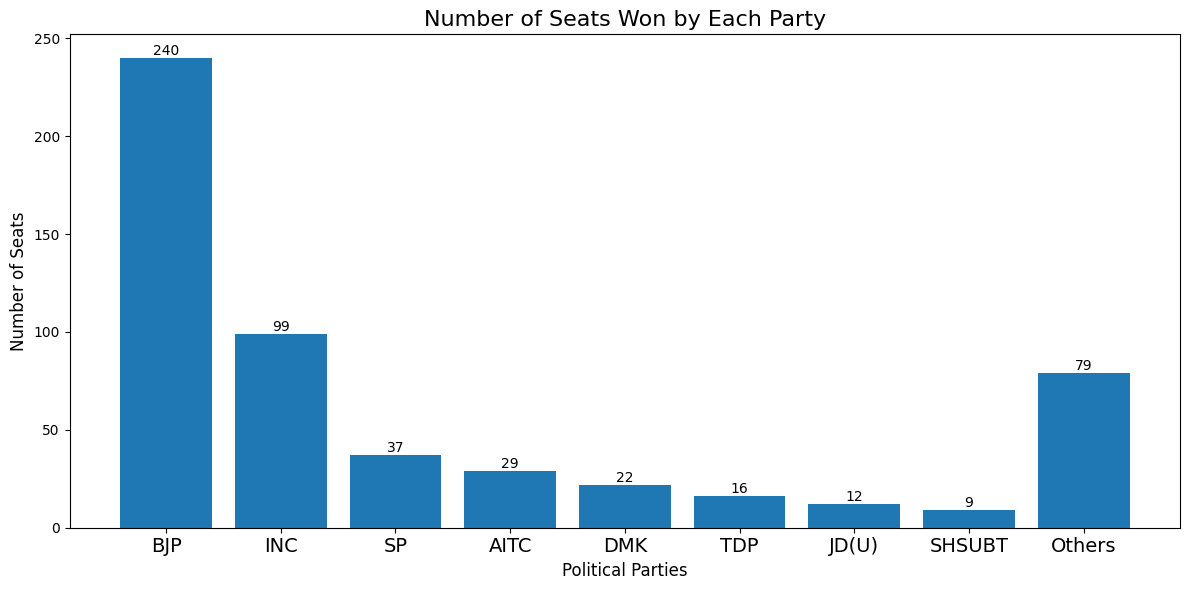

In [37]:
import numpy as np
plt.figure(figsize=(12, 6))
bars = plt.bar(df_plot['Party'], df_plot['Won'])

# Customize the chart
plt.title('Number of Seats Won by Each Party', fontsize=16)
plt.xlabel('Political Parties', fontsize=12)
plt.ylabel('Number of Seats', fontsize=12)
plt.xticks(np.arange(df_plot.shape[0]),df_plot["Party Abbreviation"],fontsize=14)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()